### 0. 모듈 불러오기

In [1]:
# 데이터 처리, 선형대수와 행렬 등 연산 모듈
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import re
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import missingno as msno
from typing import *
import pandas_datareader as web
import pandas_datareader.data as web
import pandas_datareader as pdr

# 통계적 가설검정 모듈
from scipy.stats import *
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

# 코랩에 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 데이터 시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt

# 증권 데이터 웹스크래핑 모듈
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# !pip install lxml
!pip install pykrx
!pip install finance-datareader
!pip install yfinance
!pip install pybind11
  # 의존성 모듈로 함께 설치할 것(https://riskfolio-lib.readthedocs.io/en/latest/install.html)
!pip install riskfolio-lib

import requests
from bs4 import BeautifulSoup
from pykrx import stock
import pandas_datareader.famafrench as ff
import FinanceDataReader as fdr
import pandas_datareader as web
from pandas_datareader.famafrench import get_available_datasets
import yfinance as yf
yf.pdr_override()
import riskfolio as rp

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 KB 15.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 KB 5.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 73.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 14.6 MB/s eta 0:00:00
  Created wheel for riskfolio-lib: filename=Riskfolio_Lib-4.0.3-cp39-cp39-linux_x86_64.whl size=178547 sha256=2d4e0325fee360c14261dce1a4d0c240ca577e02d208873f283850a54f9eb694
  Stored in directory: /root/.cache/pip/wheels/92/ea/e7/11b98922268bb34934514d425f7f2a563fc72e1fb7f768ef60
Successfully built riskfolio-lib


In [2]:
# 한글 폰트 사용을 위해서 세팅

from matplotlib import font_manager, rc
font_path = r"/content/drive/MyDrive/FindAlpha_RiskyAsset1/archive/korean.ttf"
  # 오류가 발생한다면, 경로를 "/content/drive/FindAlpha_RiskyAsset1/archive/korean.ttf"로 설정
  # 혹은 로컬 폰트 경로인 "C:\\WINDOWS\FONTS\malgun.ttf"로 설정
font = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font)

출처
* [김동영 외 1인, 삼성증권, Fama-French 3 Factor Model - 전후편, 2018](https://www.smallake.kr/wp-content/uploads/2018/08/Back_to_Basic_Fama-French_3_%ed%8c%a9%ed%84%b0_%eb%aa%a8%eb%8d%b8_-_%ed%9b%84%ed%8e%b820180703171930.pdf)
* [FnGuide, Factor 포트폴리오 구성 방법](https://www.fnguide.com/download/Factor_Model_Methodology.pdf)
* [Kenneth R. French, U.S. Research Returns Data](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)
* [Steven Downey, How to Build a Multi-Factor Equity Portfolio in Python, Medium article](https://medium.com/swlh/how-to-build-a-multi-factor-equity-portfolio-in-python-4560fab3df7b)
* [파이썬으로 배우는 포트폴리오](https://thebook.io/080227/ch06/05/02-02/)

### 1. 자산배분을 최적화하는 요인모델, Fama-French Mutiple factor model
(자본자산가격결정모형 CAPM과의 차이를 중심으로 이해)
* 팩터에 기반한 전략적 자산배분(SAA)은 (수익률 등에 영향을 미치는) 자산군의 특성을 설명하는데 유용한 팩터를 선택한 후, 이들 팩터의 최적 배분 비중을 찾는 것이다. 
* 원칙적으로 베타(회귀계수)는 **최소 60종목 이상 일간 또는 주간이 아닌 월간 수익률 데이터**를 활용하여 산출하여야 한다.

In [ ]:
class FamaFrenchModel():
  
  def __init__(self, html: str, from_date = None, to_date = None, 
               data_name = None, multiFactorModeling_portfolio_data = None):
    self.html = html
    self.from_date = from_date
    self.to_date = to_date
      # "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download"
    self.data_name = data_name
    self.multiFactorModeling_portfolio_data = multiFactorModeling_portfolio_data
    

  def ImportNameList(self, filtering_word1: str, filtering_word2: str):

  # 5요인 (R_market - R_free, HML, SMB, RMW, CMA) 데이터 셋 이름을 리스트에 담기
    datasets = ff.get_available_datasets( )
    data_name = [data for data in datasets if filtering_word1 in data and filtering_word2 in data]
    print(data_name)
    self.data_name = data_name
      # filtering_word1, 2(키워드)를 입력하여 프렌치 교수의 데이터 셋 명을 담은 리스트를 생성함
      # [input] {30, Industry} 
      # [output] ['30_Industry_Portfolios', '30_Industry_Portfolios_Wout_Div', '30_Industry_Portfolios_daily']
    

  def getStockCode(self, stock_list: List):

  # 주식종목코드 데이터프레임 stock_code 생성
    stock_code = pd.read_html(self.html, header = 0)[0]
    stock_code = stock_code[["종목코드", "회사명"]]
    stock_code["종목코드"] = stock_code["종목코드"].apply(
        lambda x: "0"*(6 - len(str(x))) + str(x))
      # 주식종목코드는 int 타입(연속형)으로 6자리에 맞추기 위한 0 추가하는 익명함수
    
    for stocks in stock_list:
      globals()["index_{}".format(stocks)] = stock_code[stock_code["회사명"] == stocks].index[0]
        # 회사명이 self.stock인 주식종목코드가 있는 행을 index_stock에 저장함

      globals()["code_{}".format(stocks)] = stock_code.iloc[globals()["index_{}".format(stocks)], 0]
        # 입력받은 self.stock의 주식종목코드를 code_stock에 저장함
      print(stocks, globals()["code_{}".format(stocks)])

    self.stock_list = stock_list


  def ImportDataFrame(self, n: int, ticker_name: str, from_date: str, to_date: str):
  
  # 월별 5요인 데이터 불러오기 (Feature Variable, X vector)

    # self.from_date = datetime.strptime(start, "%Y, %m, %d")
    # self.to_date = datetime.strptime(end, "%Y, %m, %d")
      # [ValueError] time data '2021,01,01' does not match format '%Y, %m, %d'

    self.from_date = from_date
    self.to_date = to_date

    factor_data = web.DataReader(self.data_name[n],
                                 "famafrench",
                                 start = self.from_date,
                                 end = self.to_date)
    print(factor_data["DESCR"])
      # portfolio_name 리스트에서 n번째 원소를 인덱싱하여 from_date부터 to_date까지의 포트폴리오 데이터 셋을 딕셔너리 타입으로 내려받음
    factor_data[0].index = factor_data[0].index.strftime("%Y-%m")
      # 인덱스의 종류를 YYYY-MM으로 날짜 형식 변환함
    factor_data = factor_data[0]
      # portfolio_data의 월별 5요인 데이터를 self.portfolio_data로 캡슐화함
      # 팩터를 구성하기 위해 한 국가의 주식을 2개의 시가총액과 3개의 B/M, 영업이익률(OP) 및 투자(INV) 그룹으로 분류

  # [Error] 자산포트폴리오 또는 개별증권의 월간 수익률 (Target Variable y)

    # for ticker in self.stock_list:
    stocks_data = stock.get_etf_ohlcv_by_date(fromdate = self.from_date, todate = self.to_date, ticker = ticker_name, freq = "m")
    stocks_data.index = stocks_data.index.strftime("%Y-%m")
    factor_data["expected_return"] = stocks_data["종가"].pct_change().fillna(0)
    # weight = np.ones(shape=(len(stocks_data.columns),)) / len(stocks_data.columns)

    # close = web.get_data_yahoo(ticker, start = self.from_date, end = self.to_date, interval = "m")["Adj Close"]
    # close.index = close.index.strtime("%Y-%m")
    # return_data = np.log(close).pct_change()[ 1: ]
      # yf.actions() : 배당, 분할 -> 수정주가 데이터로 해결할 수 있는 문제 (액면분할, 배당금, 권리행사 등의 영향을 반영)
      # yf.cashflow() / earnings() / balance_sheet()

    # multiFactorModeling_portfolio_data = pd.concat([return_data, factor_data], axis = 1, ignore_index = True)
        
    multiFactorModeling_portfolio_data = factor_data.copy()
    multiFactorModeling_portfolio_data.rename(columns = {"Mkt-RF":"market_excess_return"}, inplace = True)
    multiFactorModeling_portfolio_data["portfolio_excess_return"] = multiFactorModeling_portfolio_data["expected_return"] - multiFactorModeling_portfolio_data["RF"]
    self.multiFactorModeling_portfolio_data = multiFactorModeling_portfolio_data
    return self.multiFactorModeling_portfolio_data


  def preconditional_test(self):

  # 전제조건 1: 정규성 검정(Anderson-Darling Test, Jarque-bera Test) ShapiroWilk Test, KS Test에 비해 덜 엄격한 검정
    for column in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      anderson_result = anderson(self.multiFactorModeling_portfolio_data[column], dist = "norm")
      if anderson_result[0] > anderson_result[1][2]:
        # [0] 검정통계량(statistic)
        # [1] 임계값(유의수준 a, 5% 이상이 되는 자리값, critical_values) 
        # [2] 임계값의 유의확률 p-value
        # [1][2] 정규성 검정통계량이 유의수준 5% 검정통계량보다 클 경우, 정규분포를 따름
        print(f"{column}변수는 정규분포를 따르지 않는다")
      else: 
        print(f"{column}변수는 정규분포를 따른다")
    print("\n")

  # 전제조건 1: 정규성 검정(Jarque-bera Test) 왜도와 첨도를 이용한 검정
    for column in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      jb_result = jarque_bera(self.multiFactorModeling_portfolio_data[column])
      if jb_result[1] < 0.05:
        print(f"{column}변수는 정규분포를 따르지 않는다")
      else: 
        print(f"{column}변수는 정규분포를 따른다")
    print("\n")


  # 전제 조건 2: 등분산성 검정(정규성이 성립하지 않을 경우 Levene Test)
    for column_1 in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      for column_2 in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
        if column_1 != column_2:
          levene_result = levene(self.multiFactorModeling_portfolio_data[column_1], self.multiFactorModeling_portfolio_data[column_2])
          
          if levene_result[1] < 0.05:
            print(f"{column_1}변수와 {column_2}변수의 이분산성은 통계적으로 유의하다")
          else:
            print(f"{column_1}변수와 {column_2}변수은 등분산성 조건이 성립한다")
        
        else: # column_1 == column_2:
          pass

  # 전제 조건 3 : 다중공선성(multicollinearity)
  # 독립변수 간 상관관계가 높으면 2가지 문제가 발생함
  # (1) 유의해야 할 회귀계수 추정치가 유의하지 않게 추정됨
  # (2) 회귀계수 추정치 부호가 반대로 유의하게 추정됨
    correlation = self.multiFactorModeling_portfolio_data.drop("portfolio_excess_return", axis = 1).corr()  
      # 데이터프레임의 상관계수 행렬
    mask = np.zeros_like(correlation, dtype = np.bool)
      # 상관분석 히트맵 삼각형 마스크(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask[np.triu_indices_from( mask )] = True
    sns.heatmap(data = correlation, 
                cmap = "GnBu_r", 
                  # colormap 팔레트
                annot = True, 
                  # 실제값 표시
                fmt = "0.01f",
                  # 소수점 둘째 자리까지 표시
                mask = mask, 
                  # 표시하지 않을 위쪽 삼각형 마스크 부분 지정
                linewidths = 0.5, 
                  # 경계면 실선으로 구분
                vmin = -1,
                vmax = 1
                  # colorbar의 범위 -1 ~ 1로 지정
                )
      # 상관계수 히트맵
    plt.show()

  
  def linearRegression(self, linearRegFormula: object):
  
  # (시계열) 다중선형회귀분석 모형 추정
    FF_5factor_linearRegModel = sm.ols(
        formula = linearRegFormula, data = self.multiFactorModeling_portfolio_data
    ).fit()
    print(FF_5factor_linearRegModel.summary())
    print(FF_5factor_linearRegModel.params.apply(
        lambda x: 
        (x - FF_5factor_linearRegModel.params.mean()) / FF_5factor_linearRegModel.params.std()))

  # 전제 조건 4 : 잔차의 정규성 및 독립성 검정
  # 회귀계수(모형식의 파라미터)의 편의가 발생하고 예측의 신뢰성이 낮아지는 오차의 자기상관관계가 없는지 Durbin Watson 검정
    residual_jb_result = jarque_bera(FF_5factor_linearRegModel.resid)
    if residual_jb_result[1] < 0.05:
      print("회귀식의 잔차는 정규분포를 따르지 않는다")
    else: 
      print("회귀식의 잔차는 정규분포를 따른다")
    print("\n")
    sns.distplot(x = FF_5factor_linearRegModel.resid)
    plt.title("Residuals Histogram")

    print(f"회귀식 잔차의 DW-통계량은 {round(durbin_watson(FF_5factor_linearRegModel.resid), 4)}이다")
      # 일반적으로 1.5 ~ 2.5사이 값이면 자기상관관계가 없어 독립이라고 판단함
      # 0에 가까울수록 잔차들은 양의 자기상관을 가짐
      # 2에 가까울수록 자기상관이 없어짐
      # 2보다 크고 4에 가까워질수록 잔차들은 음의 자기상관을 가짐

"""
  # 결정계수 : 선행조건(train : test split and predict test with train model)
  # 분산팽창인자 1 / 1 - R^2 (VIF: variance inflation factor), 10 이상이면 다중공선성 有

    y_test, y_pred = 0, 0
    SST = sum(y_test - y_test.mean())**2
      # 편차의 제곱(Total Sum of Squqres) = 총변동
    SSR = sum(y_pred - y_test.mean())**2
      # 편차와 잔차의 차이 제곱(Regression sum of squares) = 추정회귀식으로 설명가능한 변동
    SSE = sum(FF_5factor_linearRegModel.resid)**2
      # 잔차의 제곱(Error Sum of Squares) = 회귀식으로 설명할 수 없는 변동
    R_squared = (1 - SSE/SST)
    k = len(self.multiFactorModeling_portfolio_data) - 1
    n = FF_5factor_linearRegModel.nobs
    Adjusted_R_squared = 1 - (SSE/(n-k-1)) / (SST/(n-1))
"""

```
FF = FamaFrenchModel(html = "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download")
FF.ImportNameList(filtering_word1 = "5", filtering_word2 = "Factor")
```
```
DF = FF.ImportDataFrame(n = -1, from_date = "20210101", to_date = "20230101", ticker_name = "102110") 
  # [102110] TIGER 200 ETF
DF
FF.preconditional_test()
  # 선형회귀식 추정 전 모형 전제요건에 대한 가설검정 및 상관분석
FF.linearRegression(linearRegFormula = "portfolio_excess_return ~ market_excess_return + SMB + HML + RMW + CMA")
  # Fama French 5 Factors Model
FF.linearRegression(linearRegFormula = "portfolio_excess_return ~ market_excess_return")
  # Capital Asset Price Model
```

---

### 2. 다요인모형에 대한 또 한 번의 문샷
다중선형회귀계수 즉, 요인민감도를 통해 증권 투자로 특정위험을 감수하는 것에 대한 보상을 (위험/보상관계) 계량화한다. 단, 이때 리스크 팩터는 (1) 팩터의 견고함(robustness)과 (2) 팩터의 단순함을 갖추어야 한다. 결국 투자자는 새로운 팩터를 설계하고 테스트하면서 유효성을 검증하여야 할 것이다.

팩터의 비중을 조절하면 횡적 리스크 모델(cross-sectional risk models), 팩터포트폴리오와 무위험자산의 비중을 동적으로 조절하면 종적 리스크 모델(time-series risk models)라고 한다.

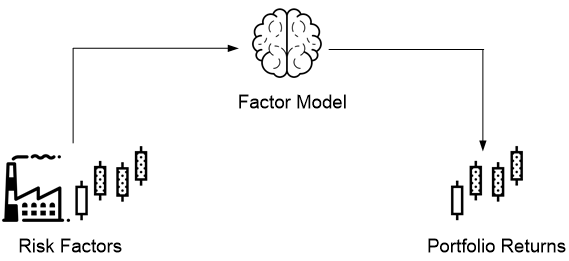

예시 : 미래에셋자산운용의 미래에셋AI스마트베타EMP증권자투자신탁(주식-재간접형)

장기적 초과수익이 기대되는 다양한 팩터(Factor) 비중을 인공지능 알고리즘 모델을 활용해서 투자

예시 : 삼성 Factor 모델(매크로 다이나믹 모델) 기반의 포트폴리오 전략

19/4/15 “팩터 모델의 구조와 해설: Factor Models for Asset Returns”

21/1/11 “주식 스타일 Fact Book”

21/7/16 “월간 팩터 추천 종목: 2021년 7월 ~ 8월”

#### **Fama-French 3-팩터 모델**
투자자산 또는 포트폴리오의 초과수익을 설명하는 2가지 팩터를 추가하여 확장한 CAPM(자본자산가격결정모형)
* $ E(r_i) - r_f = a + B_{mkt}⋅MKT + B_{smb}⋅SMB + B_{hml}⋅HML $
* 시장 팩터(MKT, Market Factor) 주식시장 내 모든 주식들을 포함한 포트폴리오의 시총가중
수익률

  (무위험수익률의 예 : 매월 월초 기준의 CD 91일물 금리)

* 규모 팩터(SMB, Small Minus Big) 시가총액이 큰 주식 대비 시가총액(주식가격 * 발행주식 수)이 작은 주식의 초과수익률을 측정한다.
* 가치 팩터(HML, High Minus Low) 성장주식 대비 초과가치 주식의 초과수익률을 측정한다. 가치주식은 높은 시장가 대비 장부가(Book to Market) 비율을 가지고 성장주식은 B/M비율이 낮다.
* 회귀분석에서 종속변수로 활용되는 $ E(r_i) - r_f $는 다음과 같이 측정한다. 시가총액과 B/M비율을 활용하여 5x5,  주식포트폴리오 25개 형태로 만든다. 이는 각 t년 6월 말 주식을 시가총액 기준으로 5개 그룹으로 나누며 PBR의 역수인 B/M비율 기준으로 5개 그룹으로 나눈다. 그 다음 이들의 교집합을 통해 5x5 포트폴리오를 만든다. 이후 포트폴리오별 시가총액 가중수익률을 측정한다. 

#### **Carhart 4-팩터 모델**
투자자산 또는 포트폴리오의 초과수익을 설명하는 2가지 팩터를 추가하여 확장한 CAPM(자본자산가격결정모형)
* $ E(r_i) - r_f = a + B_{mkt}⋅MKT + B_{smb}⋅SMB + B_{hml}⋅HML + B_{wml}⋅WML $
* 시장 팩터(MKT, Market Factor)
* 규모 팩터(SMB, Small Minus Big)
* 가치 팩터(HML, High Minus Low)
* 모멘텀 팩터(WML, Winners Minus Losers) 과거 12개월 동안의 loser 주식에 대한 winner 주식의 초과수익을 측정한다. 

#### **Fama-French 5-팩터 모델**
투자자산 또는 포트폴리오의 초과수익을 설명하는 2가지 팩터를 추가하여 확장한 CAPM(자본자산가격결정모형)
* $ E(r_i) - r_f = a + B_{mkt}⋅MKT + B_{smb}⋅SMB + B_{rmw}⋅RMW + B_{cma}⋅CMA $
* 시장 팩터(MKT, Market Factor)
* 규모 팩터(SMB, Small Minus Big)
* 가치 팩터(HML, High Minus Low)
* 수익성 팩터(RMW, Robust Minus Weak) 영업활동 현금흐름에 따른 영업이익 (이익인지 변화율인지 확인 필요)이 낮은 회사에 비해 높은 회사의 초과 수익률을 측정한다. 
* 투자 팩터(CMA, Conservative Minus Aggressive) 저투자정책 회사의 중급 이상 투자정책 회사 대비 초과 이익률을 측정한다.

* FnGuide에 따르면 이외에도 배당성, 거시경제민감도, 단기 return, 저변동성, 종목의견 등의 팩터(스타일 리스크 팩터와 업종 리스크 팩터)가 있다. 

In [123]:
# 네이버 금융, FnGuide에서 상장주식회사의 연결재무제표 데이터를 크롤링하는 함수
# pykrx의 문제는 발행주식 수의 변화(액면분할)를 반영하지 못하면서 단순히 주가에서 EPS를 나눠주는 방법으로 PER 등을 계산

class CrawlingFinancialData():
  
  def __init__(self, html_stock_code: str, url_naver_finance: str, 
               operating_profit_margin = None, net_profit_margin = None, return_on_equity = None, debt_ratio = None, price_to_book_value_ratio = None, divendend_payout_ratio = None):

    self.html_stock_code = html_stock_code
    self.url_naver_finance = url_naver_finance

    self.operating_profit_margin = operating_profit_margin
    self.net_profit_margin = net_profit_margin
    self.return_on_equity = return_on_equity
    self.debt_ratio = debt_ratio
    self.price_to_book_value_ratio =  price_to_book_value_ratio
    self.divendend_payout_ratio = divendend_payout_ratio


# getStockCode() : 상장주식종목 코드번호를 html을 통해 데이터프레임 형태로 불러오는 함수
  def getStockCode(self) -> pd.DataFrame:
  
  # 1. 상장지수 회사명 및 종목코드 데이터를 불러오기
    KOSPI_code_list = pd.read_html(self.html_stock_code + "?method=download&marketType=stockMkt")[0]
    KOSDAQ_code_list = pd.read_html(self.html_stock_code + "?method=download&marketType=kosdaqMkt")[0]
    KOSPI_code_list = KOSPI_code_list[["회사명", "종목코드"]]
    KOSDAQ_code_list = KOSDAQ_code_list[["회사명", "종목코드"]]
      # 각 시장별 회사명, 종목코드만 추출
    KOSPI_code_list["종목코드"] = KOSPI_code_list["종목코드"].apply(lambda x: "0"*(6 - len(str(x))) + str(x))
    KOSDAQ_code_list["종목코드"] = KOSDAQ_code_list["종목코드"].apply(lambda x: "0"*(6 - len(str(x))) + str(x))
      # 주식종목코드는 int 타입(연속형)으로 6자리에 맞추기 위한 0 추가하는 익명함수(lambda)

  # 2. KOSPI, KOSDAQ 상장주식종목에서 리츠와 ETF를 제거
  # 문자열 정규표현식에서 "리츠"와 "스팩"을 필터링하여 해당 행 번호를 추출하여 데이터프레임에서 삭제
    KOSPI_code_list.drop(
        KOSPI_code_list[KOSPI_code_list["회사명"].str.contains(r"(스팩)") == True].index.tolist(), axis = 0, inplace = True)
    KOSPI_code_list.drop(
        KOSPI_code_list[KOSPI_code_list["회사명"].str.contains(r"(리츠)") == True].index.tolist(), axis = 0, inplace = True)
    KOSDAQ_code_list.drop(
        KOSDAQ_code_list[KOSDAQ_code_list["회사명"].str.contains(r"(스팩)") == True].index.tolist(), axis = 0, inplace = True)
    KOSDAQ_code_list.drop(
        KOSDAQ_code_list[KOSDAQ_code_list["회사명"].str.contains(r"(리츠)") == True].index.tolist(), axis = 0, inplace = True)
    return KOSPI_code_list, KOSDAQ_code_list


# corporationBalanceSheetConnect() : 네이버 금융에서 KOSPI 상장주식종목 재무데이터를 크롤링하여 딕셔너리 형태로 불러오는 함수
  def corporationBalanceSheetConnect(self, stock_code_list: pd.DataFrame):

  # 3. 상장기업의 영업이익률, 순이익률, ROE, 부채비율, PBR(시가총액 / 순자산), 배당성향 각 데이터프레임 생성
    operating_profit_margin = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
    net_profit_margin = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
    return_on_equity = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
    debt_ratio = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
    price_to_book_value_ratio = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
    divendend_payout_ratio = pd.DataFrame(index = range(0, 10), columns = stock_code_list["회사명"])
      # 배당성향 = 배당금 / 당기손익 * 100 (주주에 대한 이익사외분배율)

  # 4. 네이버 금융 웹페이지를 크롤링하여 팩터 생성을 위한 분기, 연도별 6개 재무데이터프레임을 저장하는 반복문 수행
    for index_stock_code in range(len(stock_code_list)):
      try:
        url_stock = "https://finance.naver.com/item/main.nhn?code={}".format(
            stock_code_list["종목코드"][ index_stock_code ])
          # KeyError: 36, 39
          # 매핑 (딕셔너리) 키가 기존 키 집합에서 발견되지 않을 때 발생
        response_stock = requests.get(url_stock, headers = {"User-agent" : "Mozilla/5.0"})
        html_stock = response_stock.text
        soup_object_stock = BeautifulSoup(html_stock, "lxml")
        html_finance = soup_object_stock.select("div.section.cop_analysis div.sub_section")[0]
          # CSS Selector
          # IndexError: list index out of range
        th_data_finance = [
            element.get_text().strip() 
            for element in html_finance.select("thead th")]
        date_annual = th_data_finance[3:7]
        date_quarter = th_data_finance[7:13]
        date_finance = date_annual + date_quarter
          # html 구조는 "table" > "tbody" > "tr" > "th" > "strong" tag
          # 재무제표 날짜 정보 element를 html 웹페이지의 soup 객체에서 thead 태그와 th 태그에서 추출

        index_finance = [
            element.get_text().strip()
            for element in html_finance.select("th.h_th2")
        ][3:]
          # 재무정보 지표 element를 th태그의 h_th2 클래스에서 추출

        td_data_finance = [
            element.get_text().strip() 
            for element in html_finance.select('td')
        ]
          # 재무제표 계정과목의 데이터 element를 td 태그에서 추출
        data_finance = np.array( td_data_finance )
        data_finance.resize( len(index_finance), 10 )
          # 재무제표 계정과목 데이터가 담긴 리스트를 넘파이 배열로 변환

        final_data_finance = pd.DataFrame(
            data = data_finance,
            index = index_finance,
            # columns = date_finance
        ).T
          # 최종 해당 종목코드의 상장기업의 재무 데이터프레임
          # ValueError: cannot reindex from a duplicate axis

        operating_profit_margin[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["영업이익률"]
        net_profit_margin[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["순이익률"]
        return_on_equity[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["ROE(지배주주)"]
        debt_ratio[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["부채비율"]
        price_to_book_value_ratio[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["PBR(배)"]
        divendend_payout_ratio[ stock_code_list["회사명"][index_stock_code] ] = final_data_finance["배당성향(%)"]
      
      except (KeyError, IndexError) as error:
        # print(error)
        pass
        # 딕셔너리 key 에러나 리스트의 index 에러가 있을 경우
        # [continue] 바로 다음 순번의 for loop를 수행
        # [pass] 실행할 코드가 없는 것으로 다음 행동을 수행
        # [break] 반복문 종료

    operating_profit_margin.index = date_finance
    net_profit_margin.index = date_finance
    return_on_equity.index = date_finance
    debt_ratio.index = date_finance
    price_to_book_value_ratio.index = date_finance
    divendend_payout_ratio.index = date_finance
      # 향후 index_to_datetime() 사용자 정의함수를 class 내부에서 멤버함수 간 공유하는 형태 또는
      # self를 인자로 받지 않는 전역공간에 index_to_datetime()을 통해 기능이 반복되는 내용 자동화
    
    self.operating_profit_margin = operating_profit_margin
    self.net_profit_margin = net_profit_margin
    self.return_on_equity = return_on_equity
    self.debt_ratio = debt_ratio
    self.price_to_book_value_ratio = price_to_book_value_ratio
    self.divendend_payout_ratio = divendend_payout_ratio


  # 5. 각 시장별 재무데이터프레임을 datetime인덱스를 반영하여 csv 파일로 저장 
  # 매번 크롤링해서 데이터를 불러오려면 13 ~ 15분 소요되므로 편의성을 위해 최초 1회만 실행
  def KOSPI_dataframe_to_csvfile(self, googledrive_path: str):
    self.operating_profit_margin.to_csv("{}/KOSPI_영업이익률.csv".format(googledrive_path), index = True)
    self.net_profit_margin.to_csv("{}/KOSPI_당기손익률.csv".format(googledrive_path), index = True)
    self.return_on_equity.to_csv("{}/KOSPI_자기자본이익률.csv", index = True)
    self.debt_ratio.to_csv("{}/KOSPI_부채비율.csv", index = True)
    self.price_to_book_value_ratio.to_csv("{}/KOSPI_주당순자산가치비율_PBR.csv", index = True)
    self.divendend_payout_ratio.to_csv("{}/KOSPI_배당성향.csv", index = True)
  

  def KOSDAQ_dataframe_to_csvfile(self, googledrive_path: str):
    self.operating_profit_margin.to_csv("{}/KOSDAQ_영업이익률.csv".format(googledrive_path), index = True)
    self.net_profit_margin.to_csv("{}/KOSPI_당기손익률.csv".format(googledrive_path), index = True)
    self.return_on_equity.to_csv("{}/KOSDAQ_자기자본이익률.csv", index = True)
    self.debt_ratio.to_csv("{}/KOSDAQ_부채비율.csv", index = True)
    self.price_to_book_value_ratio.to_csv("{}/KOSDAQ_주당순자산가치비율_PBR.csv", index = True)
    self.divendend_payout_ratio.to_csv("{}/KOSDAQ_배당성향.csv", index = True)

In [124]:
ImportData = CrawlingFinancialData(
    html_stock_code = "https://kind.krx.co.kr/corpgeneral/corpList.do",
    url_naver_finance = "https://finance.naver.com/sise/sise_market_sum.nhn"
)

In [127]:
KOSPI_code_list, KOSDAQ_code_list = ImportData.getStockCode()

<ipython-input-123-1f74d653c2ae>:36: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  KOSPI_code_list[KOSPI_code_list["회사명"].str.contains(r"(스팩)") == True].index.tolist(), axis = 0, inplace = True)
<ipython-input-123-1f74d653c2ae>:38: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  KOSPI_code_list[KOSPI_code_list["회사명"].str.contains(r"(리츠)") == True].index.tolist(), axis = 0, inplace = True)
<ipython-input-123-1f74d653c2ae>:40: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  KOSDAQ_code_list[KOSDAQ_code_list["회사명"].str.contains(r"(스팩)") == True].index.tolist(), axis = 0, inplace = True)
<ipython-input-123-1f74d653c2ae>:42: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  KOSDAQ_code_list[KOSDAQ_code_list["회사명"].str.contains(r"(리츠)") == True].index.tolist(), axis = 0, inplace = True)


In [128]:
print(KOSPI_code_list, "\n", KOSDAQ_code_list)

            회사명    종목코드
0         DRB동일  004840
1           DSR  155660
2            GS  078930
3     HDC현대산업개발  294870
4         KG케미칼  001390
..          ...     ...
820        현대위아  011210
821     현대코퍼레이션  011760
822  현대코퍼레이션홀딩스  227840
823          화신  010690
824        흥아해운  003280

[801 rows x 2 columns] 
              회사명    종목코드
0     CJ 바이오사이언스  311690
1         DH오토웨어  025440
2           ES큐브  050120
4         KB오토시스  024120
5          KH 전자  111870
...          ...     ...
1620          한탑  002680
1621       해성옵틱스  076610
1622     헥토이노베이션  214180
1623      홈센타홀딩스  060560
1624          힘스  238490

[1554 rows x 2 columns]


In [ ]:
ImportData.corporationBalanceSheetConnect(stock_code_list = KOSDAQ_code_list)
  # [stock_code_list] KOSPI_code_list, KOSDAQ_code_list

In [ ]:
ImportData.KOSDAQ_dataframe_to_csvfile(googledrive_path = "/content/drive/MyDrive/FindAlpha_RiskyAsset1/data")
  # 에러날 경우 "content/drive/FindAlpha_RiskyAsset1"로 재실행

---

#### Trial & Error 1

```
url_stock = "https://finance.naver.com/item/main.naver?code=" + KOSPI_code_list["종목코드"][0]
  # html 문서의 tag 내 <href> 속성값을 가져와 url_bs_data에 저장
  # [NAVER] view-source:https://finance.naver.com/ + item/main.naver?code=035420
  # 링크를 읽어와서 딕셔너리 형태로 참조함
request_get_stock = requests.get(url_stock, headers = {"User-agent" : "Mozilla/5.0"})
soup_object_stock = BeautifulSoup(request_get_stock.text, "lxml")

parameter_list: List = ["영업이익률", "순이익률", "ROE(지배주주)", "PBR(배)", "배당성향(%)"]
    # 배당성향 = 배당금 / 당기손익 * 100 (주주에 대한 이익사외분배율)

for parameter_text in parameter_list:
  if soup_object_stock.find("strong", text = parameter_text) is not None:
  parameter = " ".join(soup_object_stock.find("strong", text = parameter_text).parent["class"])  
      # html 구조는 "table" > "tbody" > "tr" > "th" > "strong" tag
      # 파라미터에 parent 노드로 이동하여 상위 <th> 태그로 이동

# 3. 클래스명이 h_th2 th_cop_anal8인 상위 element로 이동 후 하위 td element값을 가져와 리스트에 저장
  # <th scope="row" class="h_th2 th_cop_anal8"><strong>매출액</strong></th>
    # <td class=""> 53,041

  tbody_stock = soup_object_stock.find("table", attrs = {"class" : "tb_type1 tb_num tb_type1_ifrs"}).find("tbody")
  title_stock = soup_object_stock.find("th", attrs = {"class" : parameter})
    # 파라미터에 매핑되는 row 검색하여 상위 <td> 태그로 이동 후 해당 row의 모든 td 컬럼 가져와 parameter_data에 저장
    # attrs = {"class" : "~"}는 class의 속성의 값(attributes)이 "~"를 가지는 <th> 태그의 element 가져오기

  parameter_data = soup_object_stock.find("th", attrs = {"class" : parameter}).parent.find_all("td")
  parameter_value = [data.get_text().strip() for data in parameter_data]
    # parameter_data 내 각 컬럼을 data변수로 지정 후 좌우공백제거를 반복하는 for문 리스트 컴프리핸션 수행

  thead_stock = soup_object_stock.find("table", attrs = {"class" : "tb_type1 tb_num tb_type1_ifrs"})

  else: pass

# 4. 각 재무 데이터의 시점(연간, 분기 연월 정보) 가져오기
  # <table summary="기업실적분석에 관한표이며 주요재무정보를 최근 연간 실적, 분기 실적에 따라 정보를 제공합니다." class="tb_type1 tb_num tb_type1_ifrs">
		# <caption>기업실적분석 테이블</caption>

  if thead_stock is not None:
    datetime_stock = thead_stock.find("thead").find_all("th", attrs = {"scope" : "col", "class" : ""})
  else: # thead_stock is None
    continue
```

#### Trial & Error 2

```
re_encparam = re.compile("encparam: '(.*)'", re.IGNORECASE)
re_id = re.compile("id: '([a-zA-Z0-9]*)' ?", re.IGNORECASE)
url_stock = "http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd={}".format(KOSPI_code_list["종목코드"][0])
html_stock = requests.get(url_stock).text
encparam = re_encparam.search(html_stock).group(1)
encid = re_id.search(html_stock).group(1)

url_stock_enc = "http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={}&fin_typ=0&freq_typ=A&encparam={}&id={}".format(KOSPI_code_list["종목코드"][0], encparam, encid) 
html_stock_enc = requests.get(url_stock_enc, headers = {"Referer": "HACK"}).text

dfs = pd.read_html(html_stock_enc)
df_quarter = dfs[1]['분기분기컨센서스보기']
df_year = dfs[1]["연간연간컨센서스보기"]
  # pandas read_html()을 통해 html 태그 중 table 태그를 데이터프레임으로 변환

df = pd.concat([df_quarter, df_year], axis = 1)
df.drop(["2022/12(E)  (IFRS연결)", "2022/12(E)  (IFRS연결)"], axis = 1, inplace = True)
df.index = dfs[1]['주요재무정보'].values.flatten()
  # 다시 리스트로 반환
df = df.T
  # 행렬 전환
```

#### Trial & Error 3
OpenDart의 개인용 API Key의 일일호출제한은 1만건

---

In [ ]:
class getFactorData():

  def __init__(self, 영업이익률, 당기손익률, 자기자본이익률, 부채비율, 주당순자산가치비율, 배당성향):

    self.영업이익률 = 영업이익률
    self.당기손익률 = 당기손익률
    self.자기자본이익률 = 자기자본이익률
    self.부채비율 = 부채비율
    self.주당순자산가치비율 = 주당순자산가치비율
    self.배당성향 = 배당성향

  def readStockPriceData(self):
    

In [ ]:
factor = getFactorData(
    영업이익률 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_영업이익률.csv")
    당기손익률 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_당기손익률.csv")
    자기자본이익률 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_자기자본이익률.csv")
    부채비율 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_부채비율.csv")
    주당순자산가치비율 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_주당순자산가치비율_PBR.csv")
    배당성향 = pd.read_csv("/content/drive/MyDrive/FindAlpha_RiskyAsset1/data/KOSPI_배당성향.csv")
)
  # 에러날 경우 "content/drive/FindAlpha_RiskyAsset1"로 재실행

In [116]:
주당순자산가치비율